https://mp.weixin.qq.com/s?__biz=MzIwODI2NDkxNQ==&mid=2247491475&idx=2&sn=337c9eca28ab24eea5d697687eb4303c&chksm=9704942fa0731d39ee5b61186014c8fed17b08ed56fe86c5fb113b92ad240199daa406078445&scene=126&sessionid=1603865144&key=14beeba64fb9d2879d9eeacced8321894be8b0994585577a03befb1631ebd97e571cd0a266544ec889edfe148d9e86a57198f74484544b051762a3223d8cecd43b337f6aaf52781c6cc3c461fa6df5b0d42598cdf5cdcccdcd645a558ec212e132652d1600cbadb6dac3e1f158c002c74f04309fb8b1805e707c9d0d20568e3d&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10+x64&version=6300002f&lang=zh_CN&exportkey=AR8lJAn3Ve9B4j1XK0NyGpw%3D&pass_ticket=0BVkXjGRc1leewhvh%2B41NnEtNzoa3bggQ%2B036XEOyQFaXzNPgIrBNJi9VtLfpUfr&wx_header=0

In [3]:
from feature_selector import FeatureSelector
import pandas as pd

In [4]:
train = pd.read_csv('../dataset/FeatureSelectorUsage/credit_example.csv')
train_labels = train['TARGET']
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,247408,0,Cash loans,F,Y,N,2,108000.0,172512.0,13477.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,153916,0,Revolving loans,F,Y,Y,2,135000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,229065,0,Cash loans,F,N,Y,0,112500.0,463500.0,20547.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,7.0
3,282013,0,Cash loans,F,N,Y,0,135000.0,549882.0,17739.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,142266,0,Cash loans,F,N,Y,0,90000.0,518562.0,20695.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
train = train.drop(columns=['TARGET'])

In [7]:
fs = FeatureSelector(data=train,labels=train_labels)

In [8]:
# 缺失值
fs.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [9]:
missing_features = fs.ops['missing']

In [10]:
missing_features

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

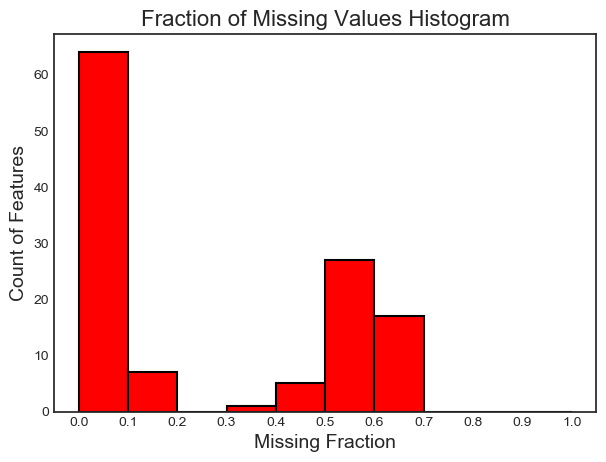

In [11]:
fs.plot_missing()

In [12]:
fs.missing_stats.head(10)

,missing_fraction
COMMONAREA_AVG,0.6953
COMMONAREA_MODE,0.6953
COMMONAREA_MEDI,0.6953
NONLIVINGAPARTMENTS_AVG,0.6945
NONLIVINGAPARTMENTS_MODE,0.6945
NONLIVINGAPARTMENTS_MEDI,0.6945
LIVINGAPARTMENTS_MEDI,0.6846
LIVINGAPARTMENTS_AVG,0.6846
LIVINGAPARTMENTS_MODE,0.6846
FONDKAPREMONT_MODE,0.6820


In [13]:
# 唯一值
fs.identify_single_unique()

4 features with a single unique value.



In [14]:
# 共线(高相关性)特征
fs.identify_collinear(correlation_threshold=0.975)

24 features with a correlation magnitude greater than 0.97.



In [15]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc',n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[77]	valid_0's auc: 0.731179
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[94]	valid_0's auc: 0.76212
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[40]	valid_0's auc: 0.751866
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[73]	valid_0's auc: 0.729399
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[324]	valid_0's auc: 0.776752
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[93]	valid_0's auc: 0.732742
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[55]	valid_0's auc: 0.745687
Training until validation scores don't improve for 100 rounds.
Early stopping

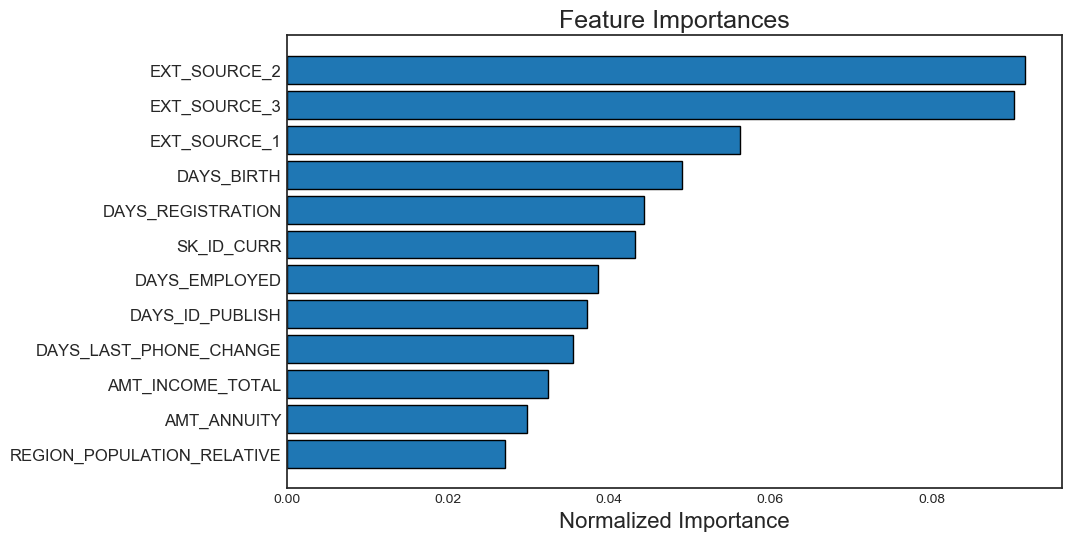

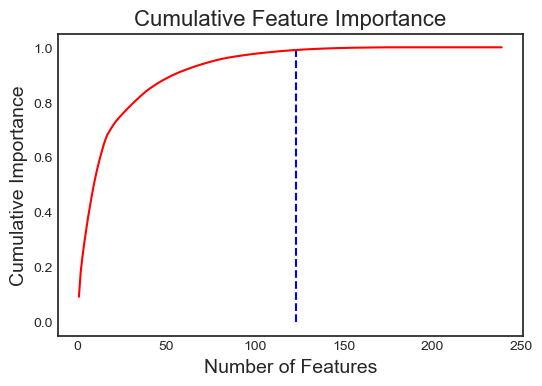

123 features required for 0.99 of cumulative importance


In [16]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)